# Tugas Besar IF2220 Probabilitas dan Statistika
## Penarikan Kesimpulan dan Pengujian Hipotesis

Dibuat oleh : 
* Lyora Felicya (13520073)
* Claudia (13520076)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

col_names = ["id", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"]
df = pd.read_csv("water_potability.csv", names = col_names)
df

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


In [13]:
df.dtypes

id                   int64
pH                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
OrganicCarbon      float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [14]:
df.isnull().sum()

id                 0
pH                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
OrganicCarbon      0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [15]:
describe_df = df.describe()

# Membuat dictionary
water = {}
water["Kolom"] = []
water["Mean"] = []
water["Median"] = []
water["Modus"] = []
water["Std"] = []
water["Var"] = []
water["Range"] = []
water["Min"] = []
water["Max"] = []
water["Q1"] = []
water["Q2"] = []
water["Q3"] = []
water["IQR"] = []
water["Skew"] = []
water["Kurtosis"] = []

for column in describe_df:
    water["Kolom"].append(column)
    water["Mean"].append(describe_df[column]["mean"])
    water["Median"].append(df.median()[column])
    water["Modus"].append(df.mode("index")[column][0])
    water["Std"].append(describe_df[column]["std"])    
    water["Var"].append(df.var()[column])
    water["Range"].append(describe_df[column]["max"] - describe_df[column]["min"])
    water["Min"].append(describe_df[column]["min"])   
    water["Max"].append(describe_df[column]["max"])    
    water["Q1"].append(describe_df[column]["25%"])   
    water["Q2"].append(describe_df[column]["50%"]) 
    water["Q3"].append(describe_df[column]["75%"])   
    water["IQR"].append(describe_df[column]["75%"] - describe_df[column]["25%"])
    water["Skew"].append(df.skew()[column])
    water["Kurtosis"].append(df.kurtosis()[column])


dataframe_new = pd.DataFrame(water, index = [i for i in range(1,12)])
dataframe_new

,Kolom,Mean,Median,Modus,Std,Var,Range,Min,Max,Q1,Q2,Q3,IQR,Skew,Kurtosis
1,id,1005.500000,1005.500000,1.000000,580.381340,3.368425e+05,2009.000000,1.000000,2010.000000,503.250000,1005.500000,1507.750000,1004.500000,0.000000,-1.200000
2,pH,7.087193,7.029490,0.227499,1.572803,2.473709e+00,13.772501,0.227499,14.000000,6.090785,7.029490,8.053006,1.962221,0.048535,0.626904
3,Hardness,195.969209,197.203525,73.492234,32.643166,1.065576e+03,243.845890,73.492234,317.338124,176.740657,197.203525,216.447589,39.706932,-0.085321,0.525480
4,Solids,21904.673439,20926.882155,320.942611,8625.397911,7.439749e+07,56167.729801,320.942611,56488.672413,15614.412962,20926.882155,27170.534649,11556.121687,0.591011,0.337320
5,Chloramines,7.134322,7.142014,1.390871,1.585214,2.512904e+00,11.736129,1.390871,13.127000,6.138326,7.142014,8.109933,1.971607,0.013003,0.549782
6,Sulfate,333.211376,332.214113,129.000000,41.211111,1.698356e+03,352.030642,129.000000,481.030642,307.626986,332.214113,359.268147,51.641161,-0.045728,0.786854
7,Conductivity,426.476708,423.438372,201.619737,80.701872,6.512792e+03,551.722883,201.619737,753.342620,366.619219,423.438372,482.209772,115.590553,0.268012,-0.237206
8,OrganicCarbon,14.357940,14.323286,2.200000,3.325770,1.106075e+01,24.806707,2.200000,27.006707,12.122530,14.323286,16.683562,4.561031,-0.020220,0.031018
9,Trihalomethanes,66.400717,66.482041,8.577013,16.081109,2.586021e+02,115.422987,8.577013,124.000000,55.949993,66.482041,77.294613,21.344620,-0.051383,0.223017
10,Turbidity,3.969497,3.967374,1.450000,0.780471,6.091350e-01,5.044749,1.450000,6.494749,3.442882,3.967374,4.514663,1.071781,-0.032266,-0.049831


## Nomor 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

## Nomor 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

## Nomor 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

a. Nilai Rata-rata pH di atas 7?

b. Nilai Rata-rata Hardness tidak sama dengan 205?

c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

## Nomor 5
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

d.  Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?


Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

## Nomor 6
Menentukan apakah kolom non-target berkorelasi dengan kolom target dan gambarkan scatter plot dengan correlation test

pH

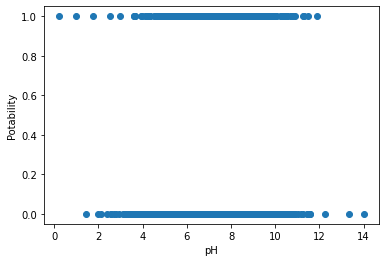

Correlation: 0.01547509440843348


In [30]:
import matplotlib.pyplot as plt

plt.scatter(x = df["pH"],y = df["Potability"])
plt.xlabel("pH")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["pH"].corr(df["Potability"]))))

Hardness

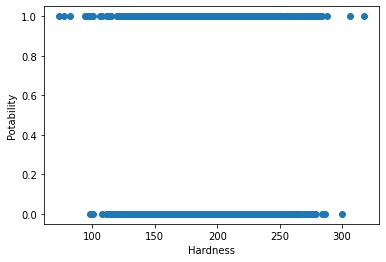

Correlation: -0.0014631528959479344


In [31]:
plt.scatter(x = df["Hardness"],y = df["Potability"])
plt.xlabel("Hardness")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Hardness"].corr(df["Potability"]))))

Solids

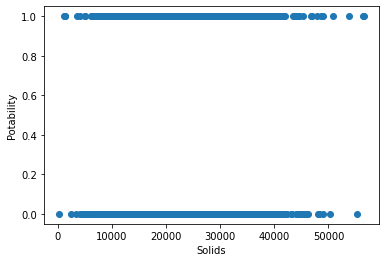

In [18]:
plt.scatter(x = df["Solids"],y = df["Potability"])
plt.xlabel("Solids")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Solids"].corr(df["Potability"]))))

Chloramines

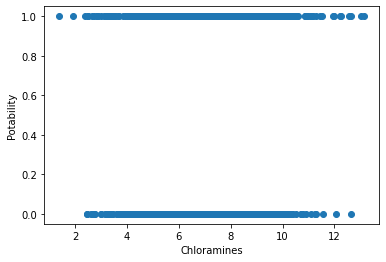

In [20]:
plt.scatter(x = df["Chloramines"],y = df["Potability"])
plt.xlabel("Chloramines")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Chloramines"].corr(df["Potability"]))))

Sulfate

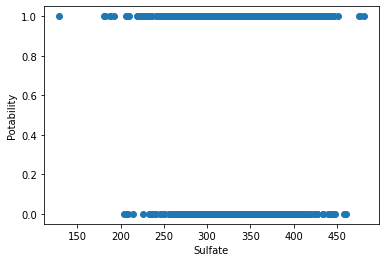

Correlation: -0.015703164419273778


In [32]:
plt.scatter(x = df["Sulfate"],y = df["Potability"])
plt.xlabel("Sulfate")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Sulfate"].corr(df["Potability"]))))

Conductivity

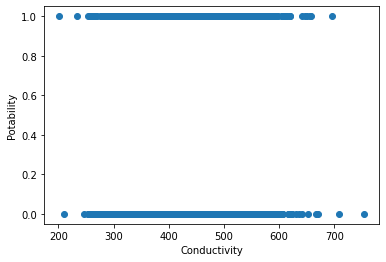

Correlation: -0.016257120111377067


In [33]:
plt.scatter(x = df["Conductivity"],y = df["Potability"])
plt.xlabel("Conductivity")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Conductivity"].corr(df["Potability"]))))

OrganicCarbon

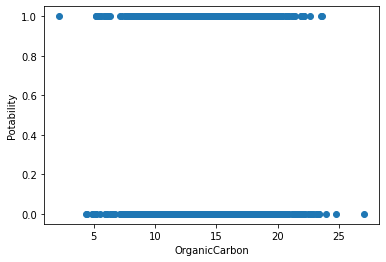

Correlation: -0.015488461910747259


In [34]:
plt.scatter(x = df["OrganicCarbon"],y = df["Potability"])
plt.xlabel("OrganicCarbon")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["OrganicCarbon"].corr(df["Potability"]))))

Trihalomethanes

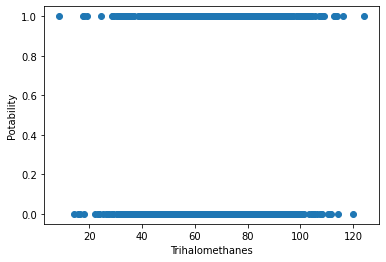

Correlation: 0.009236711064712997


In [35]:
plt.scatter(x = df["Trihalomethanes"],y = df["Potability"])
plt.xlabel("Trihalomethanes")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Trihalomethanes"].corr(df["Potability"]))))

Turbidity

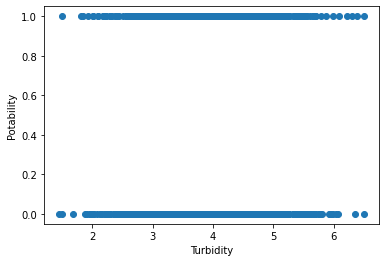

Correlation: 0.022331042640622665


In [37]:
plt.scatter(x = df["Turbidity"],y = df["Potability"])
plt.xlabel("Turbidity")
plt.ylabel("Potability")
plt.show()

print("Correlation: " + str((df["Turbidity"].corr(df["Potability"]))))